In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import urllib.request
import zipfile
import os
import matplotlib.pyplot as plt
print("Semua library berhasil diimport!")

Semua library berhasil diimport!


In [ ]:
def download_and_extract_data():
    train_url = 'https://github.com/dicodingacademy/assets/releases/download/release-horse-or-human/horse-or-human.zip'
    urllib.request.urlretrieve(train_url, 'horse-or-human.zip')
    with zipfile.ZipFile('horse-or-human.zip', 'r') as zip_ref:
        zip_ref.extractall('data/horse-or-human')

    val_url = 'https://github.com/dicodingacademy/assets/raw/main/Simulation/machine_learning/validation-horse-or-human.zip'
    urllib.request.urlretrieve(val_url, 'validation-horse-or-human.zip')
    with zipfile.ZipFile('validation-horse-or-human.zip', 'r') as zip_ref:
        zip_ref.extractall('data/validation-horse-or-human')

download_and_extract_data()
print("Dataset berhasil didownload dan diekstrak!")

Dataset berhasil didownload dan diekstrak!


In [ ]:
TRAINING_DIR = 'data/horse-or-human'
VALIDATION_DIR = 'data/validation-horse-or-human'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

print("Data generator berhasil dibuat!")
print(f"Jumlah kelas training: {train_generator.num_classes}")
print(f"Contoh shape input: {train_generator.image_shape}")

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.
Data generator berhasil dibuat!
Jumlah kelas training: 2
Contoh shape input: (150, 150, 3)


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)              │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 15, 15, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,309,729 (12.63 MB)

 Trainable params: 3,309,729 (12.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    verbose=1
)

print("Training selesai!")

Epoch 1/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.5079 - loss: 0.7203 - val_accuracy: 0.5000 - val_loss: 0.6922
Epoch 2/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 33s 987ms/step - accuracy: 0.5858 - loss: 0.6985 - val_accuracy: 0.5000 - val_loss: 0.8542
Epoch 3/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.7107 - loss: 0.6321 - val_accuracy: 0.5000 - val_loss: 0.9024
Epoch 4/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 33s 984ms/step - accuracy: 0.7304 - loss: 0.5549 - val_accuracy: 0.6289 - val_loss: 0.9094
Epoch 5/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.7793 - loss: 0.4723 - val_accuracy: 0.5195 - val_loss: 4.4628
Epoch 6/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 33s 978ms/step - accuracy: 0.7834 - loss: 0.4756 - val_accuracy: 0.6875 - val_loss: 1.2861
Epoch 7/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 34s 997ms/step - accuracy: 0.8172 - loss: 0.3766 - val_accuracy: 0.5664 - val_loss: 2.5427
Epoch 8/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 33s 1000ms/step - accuracy: 0.8651 - loss: 0.3215 - val_accuracy: 0.

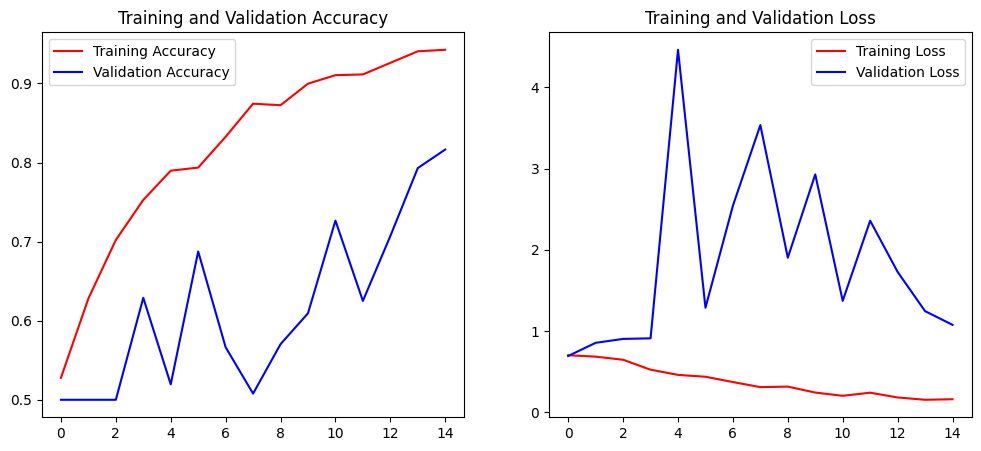

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [ ]:
final_train_acc = history.history['accuracy'][-1]

final_val_acc = history.history['val_accuracy'][-1]

print(f'\nFinal Training Accuracy: {final_train_acc*100:.2f}%')
print(f'Final Validation Accuracy: {final_val_acc*100:.2f}%')

if final_val_acc > 0.83 and final_train_acc > 0.83:
    print("Model mencapai target validation accuracy > 83%!")
else:
    print("Model belum mencapai target. Coba:")
    print("- Tingkatkan jumlah epoch (misal: 20-25)")
    print("- Tambahkan layer Conv2D/Dense")
    print("- Atur learning rate (contoh: 0.0001)")


Final Training Accuracy: 94.26%
Final Validation Accuracy: 81.64%
Model belum mencapai target. Coba:
- Tingkatkan jumlah epoch (misal: 20-25)
- Tambahkan layer Conv2D/Dense
- Atur learning rate (contoh: 0.0001)


In [ ]:
model.save('horse_human_classifier.h5')
print("Model berhasil disimpan sebagai horse_human_classifier.h5")

Model berhasil disimpan sebagai horse_human_classifier.h5
